# Ukrainian automotive market 2013-2022

Data is publically accessible at [Ukrainian Open Data Portal](https://data.gov.ua)

Anonymized annual datasets of [vehicle owners](https://data.gov.ua/en/dataset/06779371-308f-42d7-895e-5a39833375f0) for the period from 01-January-2013 till 12-October-2019 was used in analysis.
***

Questions to answer with this data (for the specific kind of transport):
1. Most popular brands with their top models
1. Preferred car colours
1. Local vs global trends over the time period
1. Vip car plates rating
1. Fuel and engine types
1. UA car owners map (visalization: brand/model per region of registration)
1. Most popular car bodies

***

## Data export from CSV-files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from pprint import pprint
from datetime import datetime

In [2]:
# Information about dataset from https://data.gov.ua/en/dataset/06779371-308f-42d7-895e-5a39833375f0

df_passport = pd.read_csv('./datasets/passport.csv')

print('Опис:\n\n' + "\n".join(df_passport['Опис'].to_list()))
df_passport.head()

Опис:

Набір даних містить інформацію щодо транспортних засобів та їх власників. Інформація в наборі розділена на окремі ресурси, кожен з яких відповідає вказаному періоду.


,ID,Заголовок,Опис,Підстава та призначення збору інформації,Частота оновлення набору даних,Мова інформації,Формати,Формат стиснення,Ключові слова,П.І.Б,E-mail відповідальної особи,Кількість файлів,Файли,Зовнішні файли,Умови використання,Востаннє оновлено,Код ЄДРПОУ,Код КОАТУУ
0,06779371-308f-42d7-895e-5a39833375f0,Відомості про транспортні засоби та їх власників,Набір даних містить інформацію щодо транспортн...,"Закон України “Про дорожній рух”, постанова КМ...",once a month,ua,"csv, zip csv zip CSV ZIP",NaN,автомобілі власники колісні засоби транспортні...,Бугаєнко Ігор Іванович,i.bugaenko@hsc.gov.ua,12,reestrTZ2018 reestrTZ2017 reestrTZ2016 reestrT...,NaN,Creative Commons Attribution,2022-12-01T15:46:05.840070,NaN,NaN


In [3]:
%%time

files = []
# files = !ls -d "$PWD"/datasets/* | grep tz_opendata # Absolute path
files = !ls -d ./datasets/* | grep tz_opendata # relative path
files

CPU times: user 2.15 ms, sys: 5.74 ms, total: 7.9 ms
Wall time: 32.7 ms


['./datasets/tz_opendata_z01012013_po31122013.csv',
 './datasets/tz_opendata_z01012014_po31122014.csv',
 './datasets/tz_opendata_z01012015_po31122015.csv',
 './datasets/tz_opendata_z01012016_po31122016.csv',
 './datasets/tz_opendata_z01012017_po31122017.csv',
 './datasets/tz_opendata_z01012018_po01012019.csv',
 './datasets/tz_opendata_z01012019_po01012020.csv',
 './datasets/tz_opendata_z01012020_po01012021.csv',
 './datasets/tz_opendata_z01012021_po01012022.csv',
 './datasets/tz_opendata_z01012022_po01122022.csv']

In [4]:
%%time
'''
    Export data from annual csv-files into one merged dataset.
    
    Starting from 2019 dataset following was changed:
        - date format was changed, and look like: 29.12.2020.
        - ',' sign is used as decimal delimeter instead of dot '.'
    
    Stratring from 03-JAN-2021 available VIN
    
'''

df = pd.DataFrame()

map_cols_dtypes = {'own_weight': np.float64,
                   'OWN_WEIGHT': np.float64,
                   'total_weight': np.float64,
                   'TOTAL_WEIGHT': np.float64,
                   'n_reg_new': object
                  }

# Custom parser for dates in datasets starting from 2019
custom_date_parser = lambda x: datetime.strptime(x, "%d.%m.%Y")

print('\n Tracking of progress: \n')

for i, file in enumerate(files):
    # Custom parser and ',' as decimal delimeter from 2019 dataset and later on
    if i in [6, 7, 8, 9]: 
        dec = ','
        d_parser = custom_date_parser
    else: 
        dec = '.'
        d_parser = None

    df_ = pd.read_csv(file, sep=';', 
                      parse_dates=['d_reg'], 
                      index_col='d_reg',
                      skipinitialspace=True,
                      dtype=map_cols_dtypes,
                      on_bad_lines='skip',
                      decimal = dec,
                      date_parser=d_parser
                     )
    
    df_.rename(str.capitalize, axis='columns', inplace=True)
    #df = df.append(df_).sort_index()
    df = pd.concat([df, df_]).sort_index()
    print("Finished loop {} of {} for file: {}".format(i+1, len(files), file))
    
print("\n____ All done! ____\n")


 Tracking of progress: 

Finished loop 1 of 10 for file: ./datasets/tz_opendata_z01012013_po31122013.csv
Finished loop 2 of 10 for file: ./datasets/tz_opendata_z01012014_po31122014.csv
Finished loop 3 of 10 for file: ./datasets/tz_opendata_z01012015_po31122015.csv
Finished loop 4 of 10 for file: ./datasets/tz_opendata_z01012016_po31122016.csv
Finished loop 5 of 10 for file: ./datasets/tz_opendata_z01012017_po31122017.csv
Finished loop 6 of 10 for file: ./datasets/tz_opendata_z01012018_po01012019.csv
Finished loop 7 of 10 for file: ./datasets/tz_opendata_z01012019_po01012020.csv
Finished loop 8 of 10 for file: ./datasets/tz_opendata_z01012020_po01012021.csv
Finished loop 9 of 10 for file: ./datasets/tz_opendata_z01012021_po01012022.csv
Finished loop 10 of 10 for file: ./datasets/tz_opendata_z01012022_po01122022.csv

____ All done! ____

CPU times: user 2min 1s, sys: 13.1 s, total: 2min 14s
Wall time: 2min 14s


In [5]:
# Drop useless columns
df.drop(axis='columns', columns='Reg_addr_koatuu', inplace=True)

# Strip models from records in "Brand" column. Models are stored in "Model" column.
df1 = df.copy()
df.Brand = df1.Brand.apply(lambda x: x.split('  ')[0])

In [6]:
# Convert Make_year to datetime format

# df2 = df.copy()
# df2.Make_year = pd.to_datetime(df.Make_year, format='%Y', yearfirst=True)

## Explore dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16722850 entries, 2013-01-01 to 2022-11-30
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Person        object 
 1   Oper_code     int64  
 2   Oper_name     object 
 3   Dep_code      int64  
 4   Dep           object 
 5   Brand         object 
 6   Model         object 
 7   Make_year     int64  
 8   Color         object 
 9   Kind          object 
 10  Body          object 
 11  Purpose       object 
 12  Fuel          object 
 13  Capacity      float64
 14  Own_weight    float64
 15  Total_weight  float64
 16  N_reg_new     object 
 17  Vin           object 
dtypes: float64(3), int64(3), object(12)
memory usage: 2.4+ GB


In [8]:
df.isnull().sum()

Person                 0
Oper_code              0
Oper_name              0
Dep_code               0
Dep                    0
Brand                  0
Model                  0
Make_year              0
Color                  0
Kind                   0
Body                   0
Purpose                0
Fuel              855397
Capacity          940381
Own_weight         81087
Total_weight       12813
N_reg_new         156476
Vin             12920039
dtype: int64

In [9]:
df.sample(3)

,Person,Oper_code,Oper_name,Dep_code,Dep,Brand,Model,Make_year,Color,Kind,Body,Purpose,Fuel,Capacity,Own_weight,Total_weight,N_reg_new,Vin
d_reg,,,,,,,,,,,,,,,,,,
2014-07-22,P,40,"40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГ...",1374306,Центр ДАІ 7401,RENAULT,KANGOO,2000,ЖОВТИЙ,ЛЕГКОВИЙ,ПАСАЖИРСЬКИЙ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,1870.0,1030.0,1630.0,СВ5260ВС,NaN
2020-10-27,P,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,12295,ТСЦ 8046,VOLKSWAGEN,PASSAT,2011,СІРИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН,1984.0,1582.0,2160.0,ВТ3754СВ,NaN
2020-10-13,P,308,ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПI...,12311,ТСЦ 4645,FORD,FOCUS,2010,БІЛИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,1560.0,1391.0,1885.0,ВС1706МВ,NaN


In [10]:
%%time

# Discover top values counted for each dataset parameter
top = 5

for c in df.columns:
    print('Top {} most popular values of the "{}":\n{}\n'.format(top, c, df[c].value_counts().head(top)))

Top 5 most popular values of the "Person":
P    15128485
J     1594365
Name: Person, dtype: int64

Top 5 most popular values of the "Oper_code":
315    3196769
308    1945975
530    1300587
40     1142331
71     1068035
Name: Oper_code, dtype: int64

Top 5 most popular values of the "Oper_name":
ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ          2158222
ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)         1522776
530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ                                   1300546
40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ     1142105
315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ    1038547
Name: Oper_name, dtype: int64

Top 5 most popular values of the "Dep_code":
12295    224600
12307    198211
12296    181410
12337    180294
12294    169729
Name: Dep_code, dtype: int64

Top 5 most popular values of the "Dep":
ТСЦ 8046    292396
ТСЦ 8047    225312
ТСЦ 5641    220503
ТСЦ 4641    208682
ТСЦ 80

In [11]:
%%time

cols_of_interest = [
    'Person',
    'Oper_code',
#    'Oper_name',
    'Dep_code',
    'Dep',
    'Brand',
    'Model',
    'Color',
    'Kind',
    'Body',
    'Purpose',
    'Fuel',
#    'N_reg_new' 
]

''' # Ehhaustive list of unique values in each field. VERY BIG!!!
for c in cols_of_interest:
    print('__{}__:\n {}\n'.format(c, list(df[c].unique())))    
'''


CPU times: user 20 µs, sys: 1 µs, total: 21 µs
Wall time: 24.8 µs


" # Ehhaustive list of unique values in each field. VERY BIG!!!\nfor c in cols_of_interest:\n    print('__{}__:\n {}\n'.format(c, list(df[c].unique())))    \n"

### Chart most popular operations with vehicles

In [12]:
# Collect dictionary of operation codes and their descriptions

codes = df['Oper_code'].unique()
code_names = {}

# Dictionary of operation codes with their versions of description
for n, code in enumerate(codes, start=1):
    mask = (df.Oper_code == code)
    if mask.any():
        #print('Code {}:\n{}\n'.format(code, df.Oper_name[mask].unique()))
        code_names[code] = df.Oper_name[mask].unique()

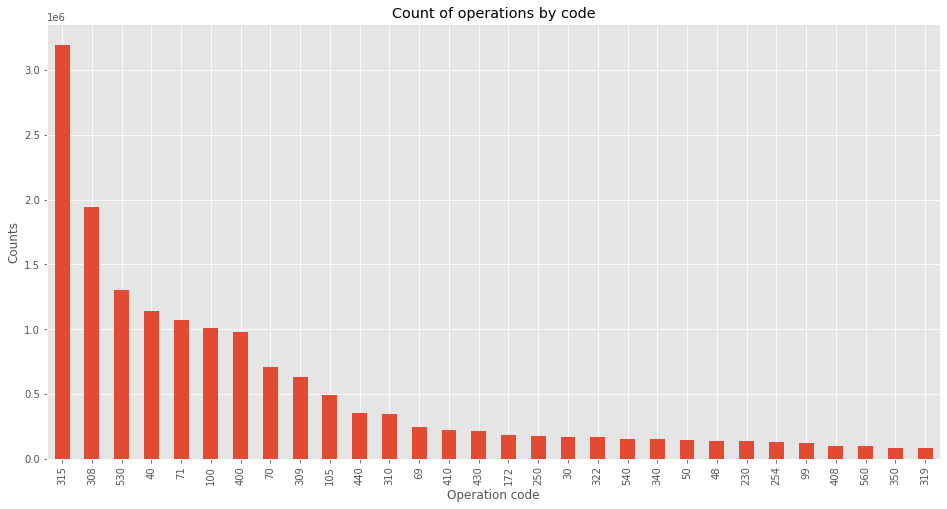

In [13]:
df.Oper_code.value_counts().sort_values(ascending=False).head(30).plot(kind='bar', 
                                                                       figsize=(16,8),
                                                                       title='Count of operations by code',
                                                                       ylabel='Counts',
                                                                       xlabel='Operation code',
                                                                      )
plt.show()

In [14]:
# Select codes for new vehicles registration
new_vehicles_codes = [40, 71, 100, 70, 105, 30]
[code_names[c] for c in new_vehicles_codes]

[array(['40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ',
        '40 -  ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ',
        'ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ'],
       dtype=object),
 array(['71 - РЕЄСТРАЦІЯ ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ПОСВІДЧЕННЮ МИТНИЦІ',
        'РЕЄСТРАЦІЯ ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ПОСВІДЧЕННЮ МИТНИЦІ'],
       dtype=object),
 array(['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ',
        '100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
        '100 -  ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ',
        '100 - ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
        'ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
        'ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ

## VIP plates rating

In [15]:
%%time

vip_plates = [
    '1111', '2222', '3333', '4444', '5555', '6666', '7777', '8888', '9999',
    '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009',
    '7000', '7700', '7770', '0777', '0077',
    '0666','0066', '6660',
    '8998', '9889', '3443', '4334', '1881',
    '1234', '0123',
]

vip_plates_number = {}

for p in vip_plates:
    cnt = df[df.N_reg_new.str.contains(p, na=False)].Person.count()
    vip_plates_number[p] = cnt
    #print('Plate "{}" found in DB {} times'.format(p, cnt))

CPU times: user 3min 28s, sys: 2.01 s, total: 3min 30s
Wall time: 3min 30s


In [16]:
start_from = 0
step = 30

till_rank = start_from + step

rank = start_from + 1

for p, cnt in sorted(vip_plates_number.items(), key=lambda kv: kv[1], reverse=True)[start_from:till_rank]:
    print('Rank ({}): Plate "{}" used {} times'.format(rank, p, cnt))
    rank += 1

Rank (1): Plate "0001" used 8793 times
Rank (2): Plate "7777" used 8429 times
Rank (3): Plate "8888" used 7318 times
Rank (4): Plate "0777" used 6810 times
Rank (5): Plate "7770" used 5594 times
Rank (6): Plate "7000" used 5034 times
Rank (7): Plate "1111" used 4683 times
Rank (8): Plate "9999" used 4136 times
Rank (9): Plate "0007" used 3990 times
Rank (10): Plate "0077" used 3927 times
Rank (11): Plate "1234" used 3015 times
Rank (12): Plate "5555" used 2998 times
Rank (13): Plate "3333" used 2765 times
Rank (14): Plate "4444" used 2727 times
Rank (15): Plate "7700" used 2533 times
Rank (16): Plate "2222" used 2468 times
Rank (17): Plate "0008" used 2352 times
Rank (18): Plate "0005" used 2145 times
Rank (19): Plate "0003" used 2144 times
Rank (20): Plate "0002" used 2114 times
Rank (21): Plate "0123" used 2087 times
Rank (22): Plate "0066" used 2043 times
Rank (23): Plate "1881" used 1981 times
Rank (24): Plate "8998" used 1927 times
Rank (25): Plate "0666" used 1875 times
Rank (26)

## Examples of searching data

In [17]:
# Example of search for a specific car

df_cx5 = df[(df['Brand'] == 'MAZDA') 
   & (df['Model'] == 'CX-5')
   & (df['Fuel'] == 'ДИЗЕЛЬНЕ ПАЛИВО')
   & (df['Make_year'] == 2015)
   & (df['Color'] == 'СІРИЙ')
   & (df['N_reg_new'].str.contains('7379', na=False))
      ]
df_cx5

,Person,Oper_code,Oper_name,Dep_code,Dep,Brand,Model,Make_year,Color,Kind,Body,Purpose,Fuel,Capacity,Own_weight,Total_weight,N_reg_new,Vin
d_reg,,,,,,,,,,,,,,,,,,
2015-12-05,P,100,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,8043,Центр 8043,MAZDA,CX-5,2015,СІРИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2191.0,1570.0,2050.0,АА7379ОХ,NaN


In [18]:
# Who is the new owner of ex-mine Fabia?

df[
    (df['N_reg_new'].str.startswith('АЕ', na=False)) 
    & (df['Brand'] == 'SKODA')
    & (df.Model == 'FABIA')
    & (df.Color == 'СІРИЙ')
    & (df.Make_year == 2008)
  ].loc['2016-1']

,Person,Oper_code,Oper_name,Dep_code,Dep,Brand,Model,Make_year,Color,Kind,Body,Purpose,Fuel,Capacity,Own_weight,Total_weight,N_reg_new,Vin
d_reg,,,,,,,,,,,,,,,,,,
2016-01-05,P,50,50 - РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ КУПIВЛI-ПРОДАЖУ,1245,Центр 1245,SKODA,FABIA,2008,СІРИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК-В,ЗАГАЛЬНИЙ,БЕНЗИН,1390.0,1100.0,1575.0,АЕ1939НР,NaN
2016-01-12,P,310,310 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ...,8044,Центр 8044,SKODA,FABIA,2008,СІРИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК-В,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1598.0,1070.0,1585.0,АЕ5545СН,NaN
2016-01-14,P,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВИДАЧI ДУБЛIКАТА СВIД...,1243,Центр 1243,SKODA,FABIA,2008,СІРИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК-В,ЗАГАЛЬНИЙ,БЕНЗИН,1390.0,1015.0,1465.0,АЕ9407ЕХ,NaN


In [19]:
# First registration of a new cars
mask2 = (df['Oper_code'].isin(new_vehicles_codes)) & (~df['Oper_name'].str.contains('Б/В', na=False))
df_new_cars = df[mask2]
df_new_cars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3841123 entries, 2013-01-01 to 2022-11-30
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Person        object 
 1   Oper_code     int64  
 2   Oper_name     object 
 3   Dep_code      int64  
 4   Dep           object 
 5   Brand         object 
 6   Model         object 
 7   Make_year     int64  
 8   Color         object 
 9   Kind          object 
 10  Body          object 
 11  Purpose       object 
 12  Fuel          object 
 13  Capacity      float64
 14  Own_weight    float64
 15  Total_weight  float64
 16  N_reg_new     object 
 17  Vin           object 
dtypes: float64(3), int64(3), object(12)
memory usage: 556.8+ MB


<AxesSubplot:xlabel='d_reg'>

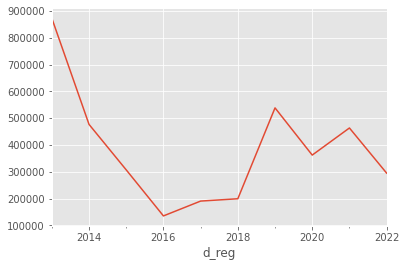

In [20]:
# Annual totals

df_new_cars.resample('A').Person.count().plot()

In [21]:
# First registration of a used cars

df_used_cars = df[(df['Oper_code'].isin(new_vehicles_codes)) & (df['Oper_name'].str.contains('Б/В', na=False))]
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750148 entries, 2018-08-29 to 2022-11-30
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Person        750148 non-null  object 
 1   Oper_code     750148 non-null  int64  
 2   Oper_name     750148 non-null  object 
 3   Dep_code      750148 non-null  int64  
 4   Dep           750148 non-null  object 
 5   Brand         750148 non-null  object 
 6   Model         750148 non-null  object 
 7   Make_year     750148 non-null  int64  
 8   Color         750148 non-null  object 
 9   Kind          750148 non-null  object 
 10  Body          750148 non-null  object 
 11  Purpose       750148 non-null  object 
 12  Fuel          699621 non-null  object 
 13  Capacity      685097 non-null  float64
 14  Own_weight    750148 non-null  float64
 15  Total_weight  750148 non-null  float64
 16  N_reg_new     750148 non-null  object 
 17  Vin           480499 non-null  o

<AxesSubplot:xlabel='d_reg'>

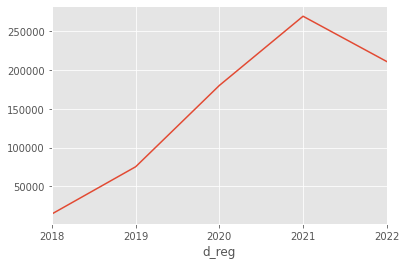

In [22]:
# Annual totals

df_used_cars.resample('A').Person.count().plot()

### Data visualization

#### Plan of the section: 

- Matplotlib visalization for various aggregated categorical data
- Timeseries for individual brand, types, models, etc.
- Predictions for the future sales/trends

In [23]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

/var/folders/xw/40lt2lkj4sxb3b9gjkk81h740000gn/T/ipykernel_18233/75550420.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_var, rotation=-30, ha='left')


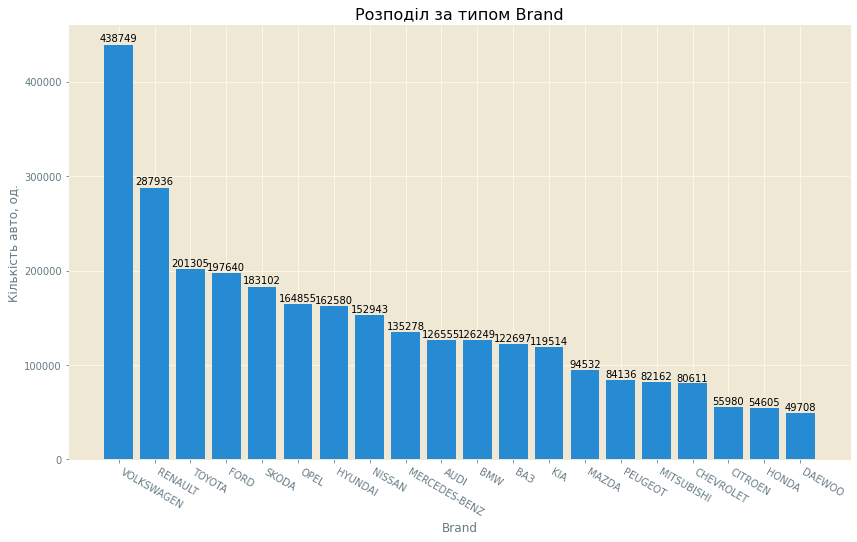

In [24]:
# Prepare data
params = ['Fuel', 'Brand', 'Model', 'Color']
p = params[1]

#UA_brands = ['ЗАЗ','DAEWOO','ЗАЗ-DAEWOO', 'ЛУАЗ']

# Subset for cars with the first registration in UA
df_all_new = df[df['Oper_code'].isin(new_vehicles_codes)]['2013':]

data = df_all_new[(df_all_new.Kind == 'ЛЕГКОВИЙ') 
#                   & (df_new_cars.Brand.isin(UA_brands)) 
                  ]

# Stripe top 20
x_var = data[p].value_counts()[:20].index
y_var = data[p].value_counts()[:20].values

# Create plot
fig, ax = plt.subplots(figsize=(14,8))
rects = ax.bar(x=x_var, height=y_var)

#  Customize plot
ax.set(ylabel='Кількість авто, од.', xlabel=p, title='Розподіл за типом ' + p)
ax.set_xticklabels(labels=x_var, rotation=-30, ha='left')
fig.patch.set_facecolor('white')

# add labels for the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,'%d' % int(height), ha='center', va='bottom')

plt.show()

In [25]:
auto_brands = sorted(list(df[df.Kind == 'ЛЕГКОВИЙ']['Brand'].unique()))
#print(auto_brands)

In [26]:
moskals = [
    'АВТОСНАБ', 'АВТОСПЕЦПРОМ', 'АГ',
    'АЗЛК', 'АС', 'АСПЗ', 'АТ', 'БАЗ', 'ВАЗ', 'ВИС', 'ВС', 'ГАЗ', 'БЕЛАВА',
    'ГАЗ-ЧАЗ', 'ГАРЗ', 'ЕМ', 'ЕРАЗ', 'ЗИЛ', 'ЗИМ', 'ЗИС', 'ИЖ', 'КАВЗ', 'КАМА', 
    'КНОТТ', 'КРИПТОН-М', 'КТП', 'МАЗ', 'МЗМА', 'ОДАЗ', 'ОДИСЕЙ', 'ПГ', 'ПГМФ', 'ПР', 'ПСКОВ', 
    'РАФ', 'РОСАВТО', 'УАЗ'
]

respectful_brands = [
    #'MAZDA',
    'RENAULT',
    #'NISSAN',
    'VOLKSWAGEN',
    'TOYOTA',
    'SKODA',
    'FORD',
    #'HYUNDAI',
    #'HONDA',
    'OPEL'
]

df_brands = [df_all_new[df_all_new['Brand'] == brand] for brand in respectful_brands]
df_moskal = df_all_new[df_all_new['Brand'].isin(moskals)]

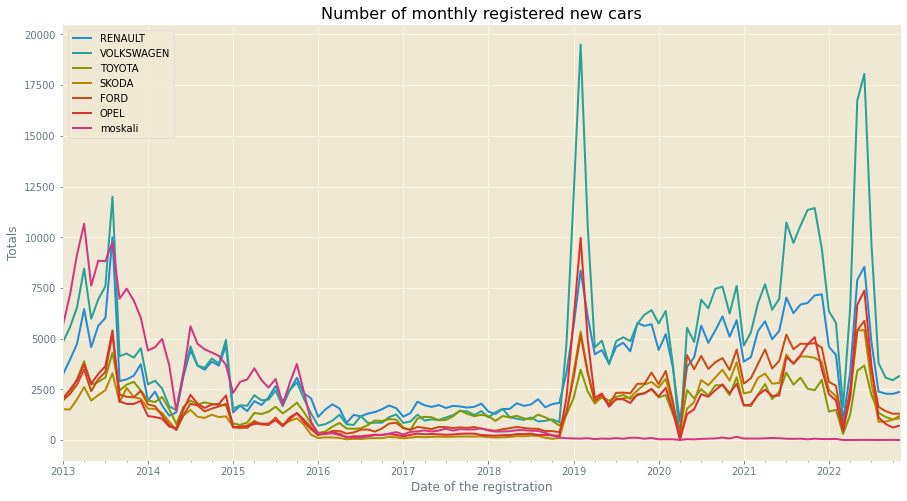

In [27]:
fig1, ax1 = plt.subplots(figsize=(15,8))

for data in df_brands:
    data[:'2022-11'].resample('M').Person.count().plot(ax=ax1)

df_moskal[:'2022-11'].resample('M').Person.count().plot(ax=ax1)


ax1.legend(respectful_brands 
           + ['moskali']
          )
ax1.set(xlabel='Date of the registration', ylabel='Totals', title='Number of monthly registered new cars')
fig1.patch.set_facecolor('white')

plt.show()

### Discovering trends

In [28]:
import statsmodels.api as sm

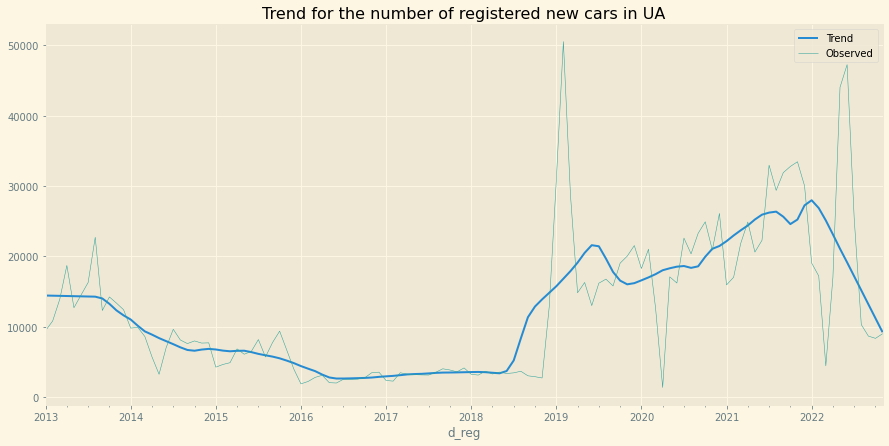

In [29]:
df_ua_brands = df[(df['Oper_code'].isin(new_vehicles_codes)) 
                  & (df['Brand'].isin(respectful_brands) 
                     & (df['Kind'] == 'ЛЕГКОВИЙ'))][:'2022']

decomposed = sm.tsa.seasonal_decompose(df_ua_brands.resample('M').Person.count(), 
                                       extrapolate_trend=1, 
                                       #freq=12
                                      )

# Create plot
fig2 = plt.figure(figsize=(15,7))

# Plot and customize
ax2 = decomposed.trend.plot(label='Trend', linewidth=2)
ax2 = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax2.set(title='Trend for the number of registered new cars in UA')
ax2.legend()

plt.show()

### Compare UA market with world wide trends

Auto and Light Truck Sales Historical Chart [dataset](https://www.macrotrends.net/1372/auto-and-light-truck-sales-historical-chart)


In [30]:
df_global_trends = pd.read_csv('./datasets/world/auto-and-light-truck-sales-historical-chart.csv', 
                               parse_dates=['date'], index_col='date', skiprows=15, skipinitialspace=True)

df_global_trends = df_global_trends['2013':'2022-11']

In [31]:
df_global_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2013-01-01 to 2022-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   119 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


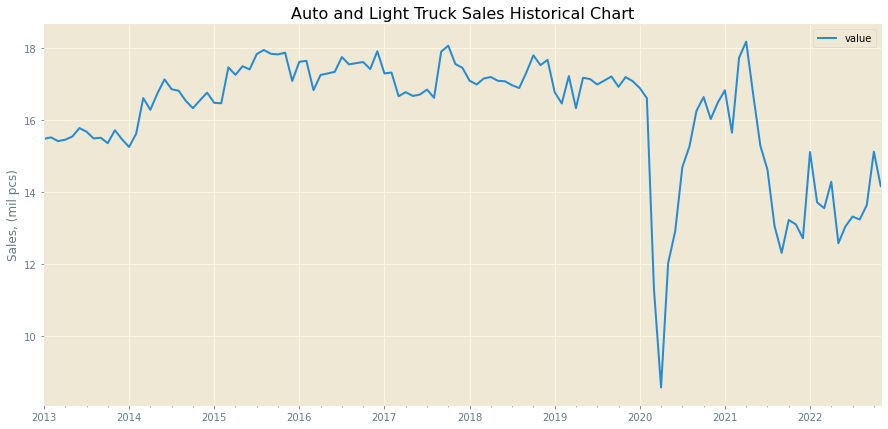

In [32]:
fig3, ax3 = plt.subplots(figsize=(15,7))
df_global_trends.plot(ax=ax3)
ax3.set(ylabel='Sales, (mil pcs)',
        xlabel='',
        title='Auto and Light Truck Sales Historical Chart',
       )

fig3.patch.set_facecolor('white')

plt.show()

In [33]:
# Normalization function for global trends
f = lambda x: (x - df_global_trends.value.min())/(df_global_trends.value.max() - df_global_trends.value.min())

# Global normalized
df_global_trends_norm = df_global_trends['value'].apply(f)

# UA monthly resampled
df_ua_monhtly = df_ua_brands['Person'].resample('M').count()

# Normalization function for UA market (Renault) sales
fn = lambda x: (x - df_ua_monhtly.min())/(df_ua_monhtly.max() - df_ua_monhtly.min())

# UA normalized
df_ua_monhtly_norm = df_ua_monhtly.apply(fn)

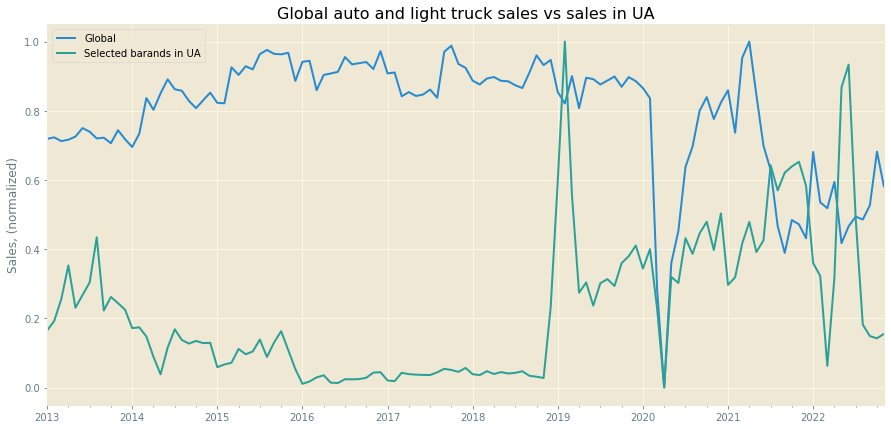

In [34]:
# Compare global and UA sales/registrations of new cars

fig4, ax4 = plt.subplots(figsize=(15,7))

df_global_trends_norm.plot(ax=ax4)
df_ua_monhtly_norm.plot(ax=ax4)

ax4.set(ylabel='Sales, (normalized)',
        xlabel='',
        title='Global auto and light truck sales vs sales in UA')
ax4.legend(['Global', 'Selected barands in UA'])
fig4.patch.set_facecolor('white')

plt.show()

### Disover and compare UA and global sales trends

In [35]:
window = 6 # Number in months

global_decomposed = sm.tsa.seasonal_decompose(df_global_trends_norm, 
                                       extrapolate_trend=1, 
                                       period=window)

ua_decomposed = sm.tsa.seasonal_decompose(df_ua_monhtly_norm, 
                                       extrapolate_trend=1, 
                                       period=window)

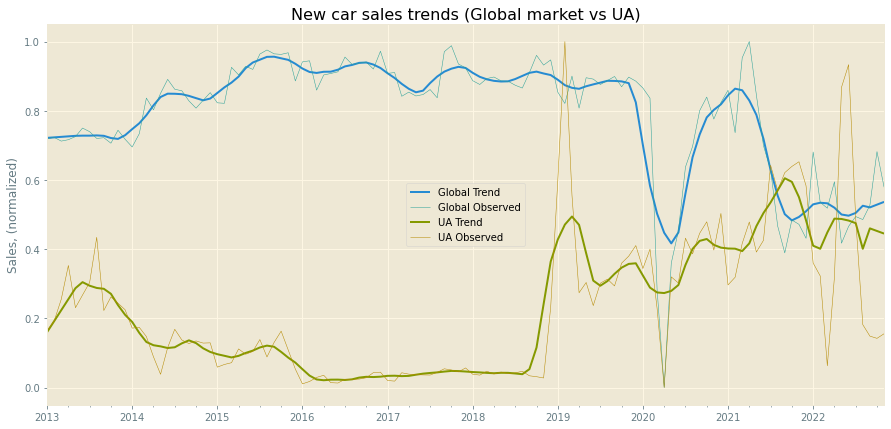

In [36]:
# Create plot
fig5 = plt.figure(figsize=(15,7))

# Plot and customize
ax5 = global_decomposed.trend.plot(label='Global Trend', linewidth=2)
global_decomposed.observed.plot(label='Global Observed', linewidth=0.5, ax=ax5)
ua_decomposed.trend.plot(label='UA Trend', linewidth=2, ax=ax5)
ua_decomposed.observed.plot(label='UA Observed', linewidth=0.5, ax=ax5)

ax5.set(title='New car sales trends (Global market vs UA)',
        xlabel='',
        ylabel='Sales, (normalized)',
       )
ax5.legend()
fig5.patch.set_facecolor('white')

plt.show()


### To be continued...